In [13]:
!pip install wordcloud

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
data=pd.read_excel('최우수,최우수 상위20%(완료).xlsx',sheet_name='Sheet5')
data.head()

,행 레이블,합계 : 수량,상품설명
0,[La belle rose]데이니 여리핏 브이트임티,100,"여리핏 맛집 프롬데이원에서 보여드리는 데일리 티셔츠♥<br>러블리, 청순부터 캐주얼..."
1,[La belle rose]뮤엔 셔링 보트넥티,98,-3kg 효과의 슬림 여리핏 >.< <br>편안하면서도 꾸민듯하게 연출하기 좋아요!♡
2,사나 슬림핏 골지가디건,92,부들부들한 착용감으로 손이 자주 갈 슬림핏 골지 가디건♡
3,1만장 돌파!/ [La belle rose]러브 퍼프 스퀘어티,91,프롬데이원 적극추천♥<br>몸매의 장점만 부각시켜 주는 러블리한 퍼프 스퀘어티:D
4,어링 모헤어니트,83,부드러운 착용감♥ 부해보이지 않고 여리여리한 무드의 골지니트에요:)


In [18]:
#경고제어
import warnings
warnings.simplefilter("ignore") # 일치하는 경고 인쇄 x, simplefilter : 경고 필터 명세 목록에 간단한 항목을 삽입

#텍스트 분석에 필요한 konlpy 불러오기 및 버전 확인
import konlpy
konlpy.__version__

'0.5.2'

In [19]:
#KoNLPy의 OKT(형태소 분석기) 불러오기
from konlpy.tag import Okt

okt=Okt()
print(okt.pos("안녕하세요"))

[('안녕하세요', 'Adjective')]


In [20]:
!pip install nltk

In [21]:
import nltk
from konlpy.tag import Okt
t=Okt()

In [22]:
data.상품설명.astype('str')

0       여리핏 맛집 프롬데이원에서 보여드리는 데일리 티셔츠♥<br>러블리, 청순부터 캐주얼...
1         -3kg 효과의 슬림 여리핏 >.< <br>편안하면서도 꾸민듯하게 연출하기 좋아요!♡
2                         부들부들한 착용감으로 손이 자주 갈 슬림핏 골지 가디건♡
3           프롬데이원 적극추천♥<br>몸매의 장점만 부각시켜 주는 러블리한 퍼프 스퀘어티:D
4                   부드러운 착용감♥ 부해보이지 않고 여리여리한 무드의 골지니트에요:)
                              ...                        
1694      화사하고 산뜻한 컬러감♥잔잔한 플라워 패턴과 러블리한 색감들로 포인트 주기 좋아요:)
1695                                   잔잔한 헤링본 패턴의 미니스커트♥
1696                    포멀한 핏으로 고급스러워 페미닌룩, 오피스룩으로 추천드려요♥
1697                                                  nan
1698             여름 시즌 교복이 되어줄 밴딩 숏팬츠:)<br>캐쥬얼하게 즐기기 좋아요!
Name: 상품설명, Length: 1699, dtype: object

In [23]:
content_text=''

for each_line in data.상품설명.astype('str'):
    content_text=content_text + each_line + '\n'

In [24]:
print(data.상품설명)
print(data.shape)

0       여리핏 맛집 프롬데이원에서 보여드리는 데일리 티셔츠♥<br>러블리, 청순부터 캐주얼...
1         -3kg 효과의 슬림 여리핏 >.< <br>편안하면서도 꾸민듯하게 연출하기 좋아요!♡
2                         부들부들한 착용감으로 손이 자주 갈 슬림핏 골지 가디건♡
3           프롬데이원 적극추천♥<br>몸매의 장점만 부각시켜 주는 러블리한 퍼프 스퀘어티:D
4                   부드러운 착용감♥ 부해보이지 않고 여리여리한 무드의 골지니트에요:)
                              ...                        
1694      화사하고 산뜻한 컬러감♥잔잔한 플라워 패턴과 러블리한 색감들로 포인트 주기 좋아요:)
1695                                   잔잔한 헤링본 패턴의 미니스커트♥
1696                    포멀한 핏으로 고급스러워 페미닌룩, 오피스룩으로 추천드려요♥
1697                                                  NaN
1698             여름 시즌 교복이 되어줄 밴딩 숏팬츠:)<br>캐쥬얼하게 즐기기 좋아요!
Name: 상품설명, Length: 1699, dtype: object
(1699, 3)


In [25]:
tokens_ko=t.morphs(content_text)
tokens_ko

['여리핏',
 '맛집',
 '프롬',
 '데이',
 '원',
 '에서',
 '보여',
 '드리는',
 '데',
 '일리',
 '티셔츠',
 '♥',
 '<',
 'br',
 '>',
 '러블리',
 ',',
 '청순',
 '부터',
 '캐',
 '주얼',
 ',',
 '꾸안',
 '꾸까지',
 '다양한',
 '스타일',
 '로',
 '활용',
 '가능하여',
 '무조건',
 '소장',
 '추천',
 '드려요',
 '!',
 '\n',
 '-',
 '3',
 'kg',
 '효과',
 '의',
 '슬림',
 '여리핏',
 '>.<',
 '<',
 'br',
 '>',
 '편안하면서도',
 '꾸민듯',
 '하게',
 '연출',
 '하기',
 '좋아요',
 '!',
 '♡',
 '\n',
 '부들부들한',
 '착용',
 '감',
 '으로',
 '손',
 '이',
 '자주',
 '갈',
 '슬림핏',
 '골지',
 '가디건',
 '♡',
 '\n',
 '프롬',
 '데이',
 '원',
 '적극',
 '추천',
 '♥',
 '<',
 'br',
 '>',
 '몸매',
 '의',
 '장점',
 '만',
 '부각시켜',
 '주는',
 '러블리',
 '한',
 '퍼프',
 '스퀘어',
 '티',
 ':',
 'D',
 '\n',
 '부드러운',
 '착용',
 '감',
 '♥',
 '부',
 '해보이지',
 '않고',
 '여리',
 '여리한',
 '무드',
 '의',
 '골지',
 '니트',
 '에요',
 ':)',
 '\n',
 '부들',
 '부들',
 '쫀쫀',
 '하고',
 '소프트',
 '한',
 '텍스쳐',
 '의',
 '깔끔한',
 '레깅스',
 '팬츠',
 '♥',
 '<',
 'br',
 '>',
 '꾸안꾸룩',
 '으로',
 '연출',
 '하기',
 '좋아요',
 ':)',
 '\n',
 '청순',
 '+',
 '섹시',
 '♥',
 '꾸민듯',
 '안',
 '꾸민듯',
 '포인트',
 '주기',
 '좋은',
 '슬림핏',
 '골지',
 '티셔츠',
 '에요'

In [26]:
ko=nltk.Text(tokens_ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))

30126
2045


In [27]:
ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200) # 가장 많이 나온 단어 200개

[('\n', 1699),
 ('♥', 1119),
 ('으로', 748),
 ('br', 661),
 ('>', 651),
 ('한', 592),
 (':)', 510),
 ('<', 471),
 ('에요', 400),
 ('로', 395),
 ('의', 381),
 ('무드', 328),
 (',', 306),
 ('이', 302),
 ('감', 292),
 ('좋은', 290),
 ('원피스', 290),
 ('연출', 276),
 ('을', 265),
 ('추천', 262),
 ('포인트', 255),
 ('♡', 236),
 ('디자인', 229),
 ('라인', 226),
 ('아이템', 223),
 ('에', 217),
 ('착용', 216),
 ('룩', 215),
 ('과', 202),
 ('!', 197),
 ('컬러', 187),
 ('이에요', 184),
 ('가', 181),
 ('하기', 174),
 ('있는', 169),
 ('니트', 160),
 ('소재', 147),
 ('활용', 146),
 ('스커트', 139),
 ('일리', 134),
 ('nan', 133),
 ('데', 132),
 ('롱', 131),
 ('수', 127),
 ('게', 125),
 ('블라우스', 125),
 ('드려요', 124),
 ('팬츠', 123),
 ('여리', 122),
 ('핏', 122),
 ('좋아요', 120),
 ('여리한', 113),
 ('러블리', 108),
 ('소장', 104),
 ('시즌', 104),
 ('해', 104),
 ('가디건', 101),
 ('!<', 98),
 ('인', 96),
 ('여름', 94),
 ('하게', 93),
 ('를', 93),
 ('실루엣', 90),
 ('베이직', 88),
 ('되는', 88),
 ('패턴', 85),
 ('기장', 84),
 ('매력', 82),
 ('고급스러운', 82),
 ('티셔츠', 80),
 ('다양한', 80),
 ('적', 80),
 ('즐기기', 

In [28]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','좋','1','는','로','으로','2','것','은','다',',','니다','대','를','2017','들','데','..','의','때','겠','고','게','네요','한','일','할','10','?','하는','06','주','려고','인데','거','좀','는데','-','ㅎㅎ','하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','지','있','못','후','중','줄','6','과','어떤','기본','!!','단어','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200)

[('\n', 1699),
 ('♥', 1119),
 ('br', 661),
 ('>', 651),
 (':)', 510),
 ('<', 471),
 ('에요', 400),
 ('무드', 328),
 ('감', 292),
 ('좋은', 290),
 ('원피스', 290),
 ('연출', 276),
 ('추천', 262),
 ('포인트', 255),
 ('♡', 236),
 ('디자인', 229),
 ('라인', 226),
 ('아이템', 223),
 ('착용', 216),
 ('룩', 215),
 ('!', 197),
 ('컬러', 187),
 ('이에요', 184),
 ('하기', 174),
 ('니트', 160),
 ('소재', 147),
 ('활용', 146),
 ('스커트', 139),
 ('일리', 134),
 ('nan', 133),
 ('롱', 131),
 ('블라우스', 125),
 ('드려요', 124),
 ('팬츠', 123),
 ('여리', 122),
 ('핏', 122),
 ('좋아요', 120),
 ('여리한', 113),
 ('러블리', 108),
 ('소장', 104),
 ('시즌', 104),
 ('해', 104),
 ('가디건', 101),
 ('!<', 98),
 ('인', 96),
 ('여름', 94),
 ('하게', 93),
 ('실루엣', 90),
 ('베이직', 88),
 ('되는', 88),
 ('패턴', 85),
 ('기장', 84),
 ('매력', 82),
 ('고급스러운', 82),
 ('티셔츠', 80),
 ('다양한', 80),
 ('적', 80),
 ('즐기기', 79),
 ('입기', 75),
 ('와', 72),
 ('바디', 70),
 ('슬림', 68),
 ('골지', 64),
 ('자켓', 62),
 ('강력', 60),
 ('까지', 60),
 ('해주는', 59),
 ('코디', 59),
 ('은은한', 58),
 ('있어요', 57),
 (':)<', 57),
 ('멋', 57),
 ('리하',

In [39]:
review_stopwords=['\n','♥',':)','♡','<','br','>',':','D','!','+','원','넥','위','매','일','별','손','갈','부','플','nan','안',':))','터','티','기','나','반','극','!^_^','인','일','!<','에요','추천','연출','해','적',':)<','데이','랩','트','성',"'",'^_^','캐','일링','S','쭉','투','하','&','/','*.*','너','컷','만','즈','감']
for word in review_stopwords:
    stop_words.append(word)

In [44]:
review_stopwords2=['좋은','디자인','해','무드','감']
for word in review_stopwords2:
    stop_words.append(word)

In [45]:
tokens_ko=[each_word for each_word in tokens_ko if each_word not in stop_words]

ko=nltk.Text(tokens_ko)
ko.vocab().most_common(200)

[('원피스', 290),
 ('포인트', 255),
 ('라인', 226),
 ('아이템', 223),
 ('착용', 216),
 ('룩', 215),
 ('컬러', 187),
 ('이에요', 184),
 ('하기', 174),
 ('니트', 160),
 ('소재', 147),
 ('활용', 146),
 ('스커트', 139),
 ('일리', 134),
 ('롱', 131),
 ('블라우스', 125),
 ('드려요', 124),
 ('팬츠', 123),
 ('여리', 122),
 ('핏', 122),
 ('좋아요', 120),
 ('여리한', 113),
 ('러블리', 108),
 ('소장', 104),
 ('시즌', 104),
 ('가디건', 101),
 ('여름', 94),
 ('하게', 93),
 ('실루엣', 90),
 ('베이직', 88),
 ('되는', 88),
 ('패턴', 85),
 ('기장', 84),
 ('매력', 82),
 ('고급스러운', 82),
 ('티셔츠', 80),
 ('다양한', 80),
 ('즐기기', 79),
 ('입기', 75),
 ('와', 72),
 ('바디', 70),
 ('슬림', 68),
 ('골지', 64),
 ('자켓', 62),
 ('강력', 60),
 ('까지', 60),
 ('해주는', 59),
 ('코디', 59),
 ('은은한', 58),
 ('있어요', 57),
 ('멋', 57),
 ('리하', 56),
 ('봄', 56),
 ('느껴지는', 55),
 ('로맨틱', 55),
 ('하고', 54),
 ('미니', 54),
 ('핏감', 54),
 ('크롭', 52),
 ('하실', 51),
 ('드리는', 49),
 ('깔끔한', 49),
 ('색감', 49),
 ('쫀쫀', 48),
 ('분위기', 48),
 ('셔츠', 47),
 ('데이트', 46),
 ('스러운', 46),
 ('주기', 45),
 ('없이', 45),
 ('스퀘어', 44),
 ('데님', 44),
 ('되어', 44),

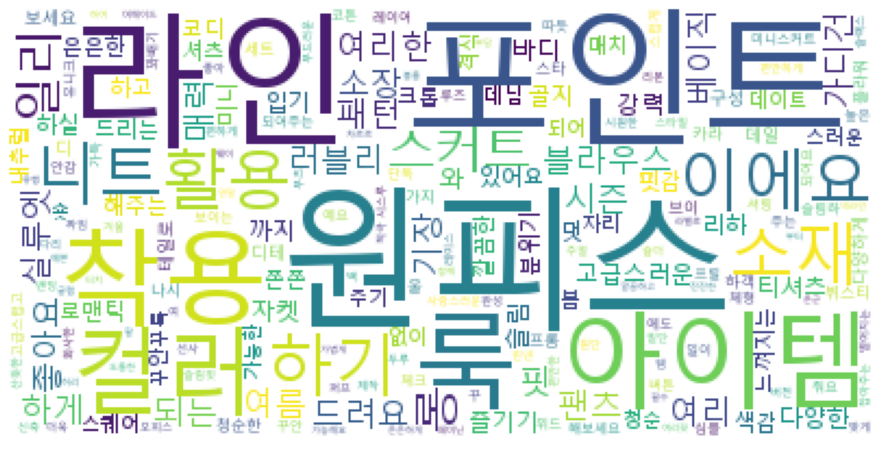

In [46]:
from wordcloud import WordCloud
wordcloud=WordCloud(font_path='C:\Windows\Fonts/malgun.ttf',
                   relative_scaling=0.2,
                   background_color='white',).generate_from_frequencies(ko.vocab())

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [47]:
!pip install graphviz

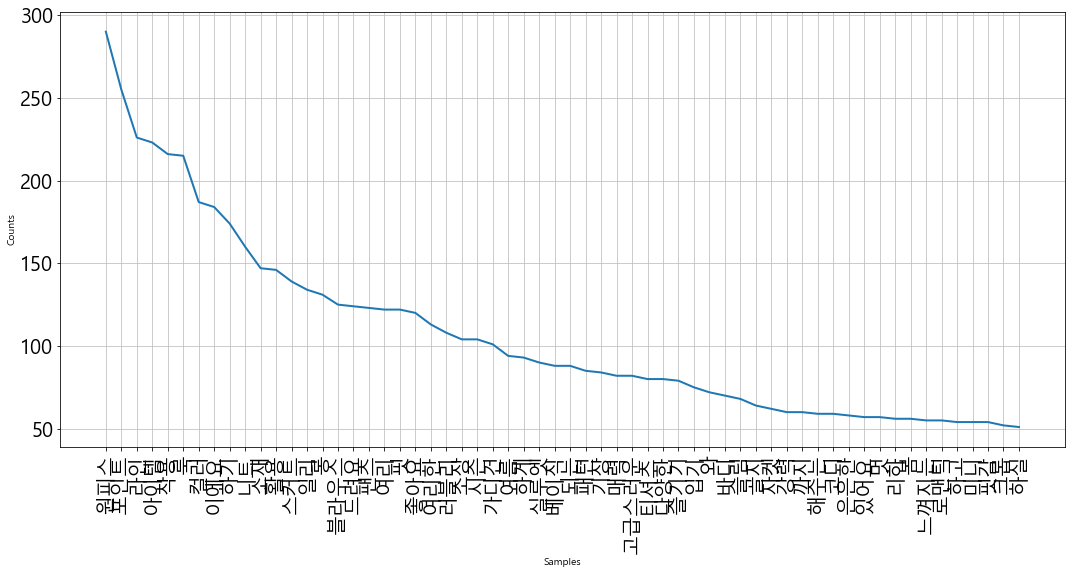

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

plt.figure(figsize=(18,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ko.plot(60)
plt.show()